## Function read data

In [21]:
import pandas as pd

def read_data(sheet_names):
    df = []
    for name in sheet_names:
        cur_df = pd.read_excel("./Data.xlsx", sheet_name=name)

        df.append(cur_df)
    return pd.concat(df, axis=0)

In [22]:
df = read_data(["F and B change"])
name = "F and B"
print(len(df))
df.head(10)


256


,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation,Year,Company
0,0.000727,0.000674,0.050894,0.081886,0.069608,0.387034,0.180589,0.223833,0.123772,0.195843,0.300118,0.000000,1.000000,2012,AAM
1,0.000466,0.000433,0.027410,0.049339,0.111150,0.366664,0.188390,0.202000,0.206333,0.204923,0.205179,0.092896,0.704841,2013,AAM
2,0.000440,0.000439,0.028212,0.050949,0.099403,0.355508,0.186101,0.204667,0.174689,0.192188,0.228325,0.398907,0.408501,2014,AAM
3,0.000319,0.000308,0.016831,0.032547,0.197203,0.302259,0.197340,0.179833,0.217643,0.120161,0.131816,0.781421,0.000000,2015,AAM
4,0.000320,0.000279,0.014587,0.037838,0.008614,0.296502,0.166174,0.178000,0.095732,0.146704,0.822283,0.524590,0.240850,2016,AAM
5,0.000189,0.000306,0.017873,0.042668,0.000000,0.285951,0.162674,0.175750,0.171043,0.201784,1.000000,0.852459,0.341204,2017,AAM
6,0.000229,0.000322,0.024445,0.049454,0.040379,0.339253,0.150056,0.215000,0.144567,0.166954,0.455473,1.000000,0.343566,2018,AAM
7,0.000428,0.000408,0.034383,0.063255,0.030908,0.328720,0.148549,0.209417,0.177064,0.152888,0.463711,0.967213,0.256198,2019,AAM
8,0.001184,0.001512,0.081189,0.099827,0.230194,0.669601,0.263679,0.310833,0.216034,0.123628,0.107493,0.000000,1.000000,2012,ABT
9,0.001054,0.001506,0.073656,0.073491,0.384048,0.531961,0.304129,0.276500,0.325775,0.085992,0.063947,0.092896,0.704841,2013,ABT


## Descriptive Statistic

In [23]:
import pandas as pd
import scipy.stats as stats

def stats_summary(df):
    """Calculates the mean, max, min, skewness, kurtosis, and Jarque-Bera probability
    of each column in a pandas dataframe.
    """
    summary = pd.DataFrame()
    for col in ['EV', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']:
        data = df[col]
        mean = data.mean()
        max_ = data.max()
        min_ = data.min()
        stdev = data.std()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        jb_prob = stats.jarque_bera(data)[1]
        summary[col] = [mean, max_, min_, stdev, skewness, kurtosis, jb_prob]
    summary.index = ['mean', 'max', 'min', 'stdev', 'skewness', 'kurtosis', 'Jarque-Bera Prob.']
    return summary

In [24]:
stats_summary(df)

,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation
mean,0.030502,0.027460,0.111449,0.096786,0.470229,4.876698e-01,0.349120,0.251675,2.350933e-01,0.376441,0.063387,0.577186,0.411895
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
stdev,0.113374,0.109645,0.127402,0.123337,0.233680,1.569929e-01,0.221681,0.089617,1.209111e-01,0.192280,0.099970,0.363099,0.288774
skewness,5.279520,5.737698,3.121759,3.535073,0.127073,1.041431e+00,0.755955,2.791000,2.398241e+00,0.687539,6.079016,-0.389395,0.783705
kurtosis,31.983771,37.464209,13.350224,16.706842,-0.942874,1.680325e+00,0.193015,18.755884,9.146909e+00,0.572734,45.910675,-1.338618,-0.130108
Jarque-Bera Prob.,0.000000,0.000000,0.000000,0.000000,0.005901,9.072055e-17,0.000005,0.000000,9.330298e-239,0.000010,0.000000,0.000003,0.000002


In [25]:
len(df)

256

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# fit a multiple linear regression model
# data_train = [df[df['Year'] < 2015], df[df['Year'] < 2016], df[df['Year'] < 2017], df[df['Year'] < 2018], df[df['Year'] < 2019]]
# data_test = [df[df['Year'] == 2015], df[df['Year'] == 2016], df[df['Year'] == 2017], df[df['Year'] == 2018], df[df['Year'] == 2019]]

# X_train = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_train]
# y_train = [data['EV'] for data in data_train]

# X_test = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_test]
# y_test = [data['EV'] for data in data_test]

# # create a MinMaxScaler object
data = df[['EV', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']]
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=['EV', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'])

# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(scaled_df, test_size=0.3, random_state=42)
X_train = train_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']]
X_test = test_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']]

y_train = train_df['EV']
y_test = test_df['EV']


In [27]:
X_train.head(10)
print(len(X_train))

179


In [28]:
data = {
    "LM": [],
    "Lasso": [],
    "GAM": [], 
    "RF": [],
    "GBM": [],
    "NNET": []
}

In [29]:
from sklearn.linear_model import LinearRegression

data['LM'] = []
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["LM"].append(round(r_squared*100, 4))
data["LM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
# Get the variable names
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)


R-squared 0.37758859474642337
RMSE 0.01210072839000017
      Variable  Coefficient
7          GDP        11.40
8    Inflation        16.02
0     Leverage        16.38
3          ROA        19.16
5  Tangibility        25.48
4       Growth        36.32
6    Liquidity        48.91
1      Quality        94.88
2         Size       100.00


/tmp/ipykernel_9654/385619033.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


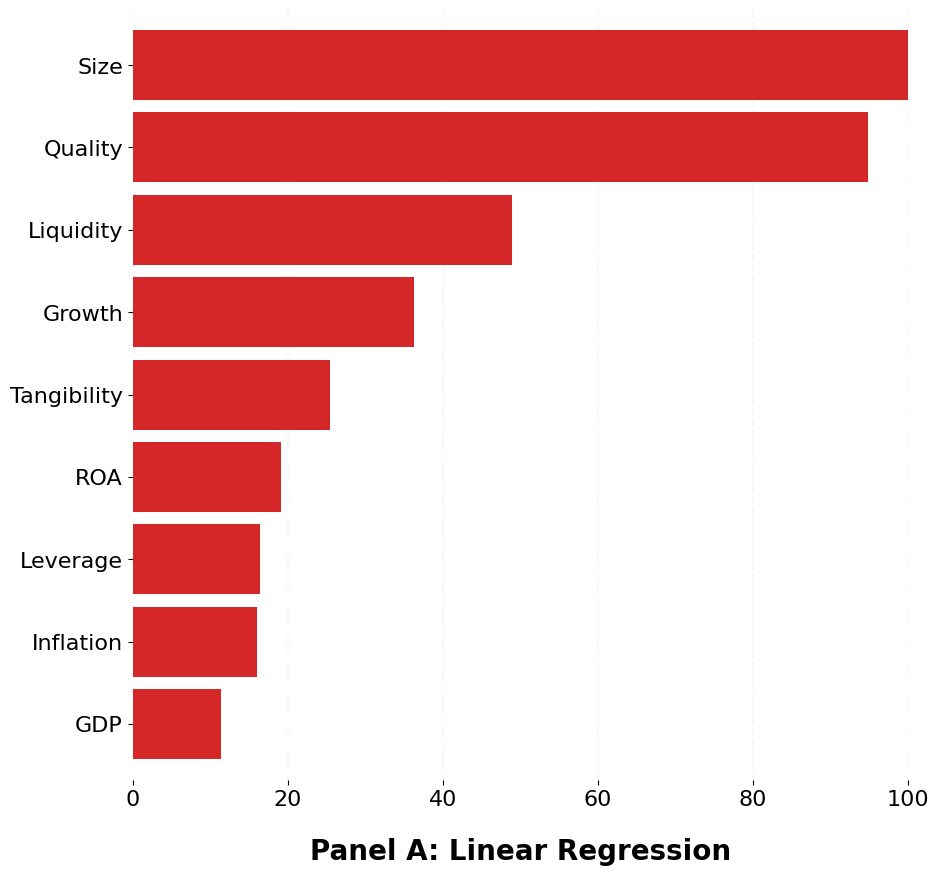

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#d62728', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel A: Linear Regression", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_LM.png')

In [31]:
from sklearn.linear_model import Lasso

data['Lasso'] = []

model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

print(sum_pred)
print(sum_avg)

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["Lasso"].append(round(r_squared*100, 4))
data["Lasso"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
print(coefficients)
# Get the variable names
variable_names =  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)

0.9331499560320949
1.4970099811239903
R-squared 0.3766574920686474
RMSE 0.012118830597819414
[ 0.0376407   0.22982165  0.26204001 -0.01716383 -0.08813334  0.06422464
  0.11181303 -0.02470802 -0.03481337]
      Variable  Coefficient
3          ROA         6.55
7          GDP         9.43
8    Inflation        13.29
0     Leverage        14.36
5  Tangibility        24.51
4       Growth        33.63
6    Liquidity        42.67
1      Quality        87.70
2         Size       100.00


/tmp/ipykernel_9654/3683564917.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


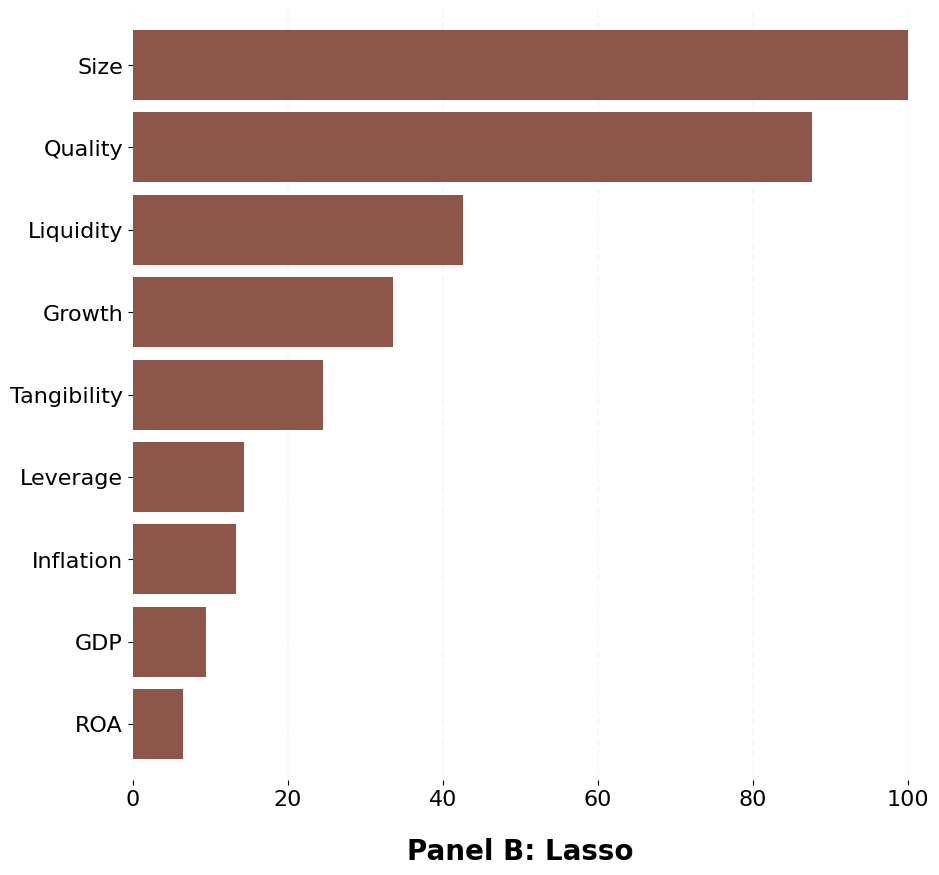

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#8c564b', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel B: Lasso", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_Lasso.png')

In [33]:
from pygam import LinearGAM

data["GAM"] = []
gam = LinearGAM()
gam.fit(X_train, y_train)
y_pred = gam.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
#  # print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["GAM"].append(round(r_squared*100, 4))
data["GAM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

 # compute variable importance
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']
coefs = gam.coef_


# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefs[0:9]})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.800548006370501
RMSE 0.003877683444395304
      Variable  Coefficient
8    Inflation        17.53
7          GDP        28.05
6    Liquidity        42.79
5  Tangibility        62.63
4       Growth        77.06
3          ROA        83.82
2         Size        89.58
1      Quality        94.91
0     Leverage       100.00


/tmp/ipykernel_9654/3447420446.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


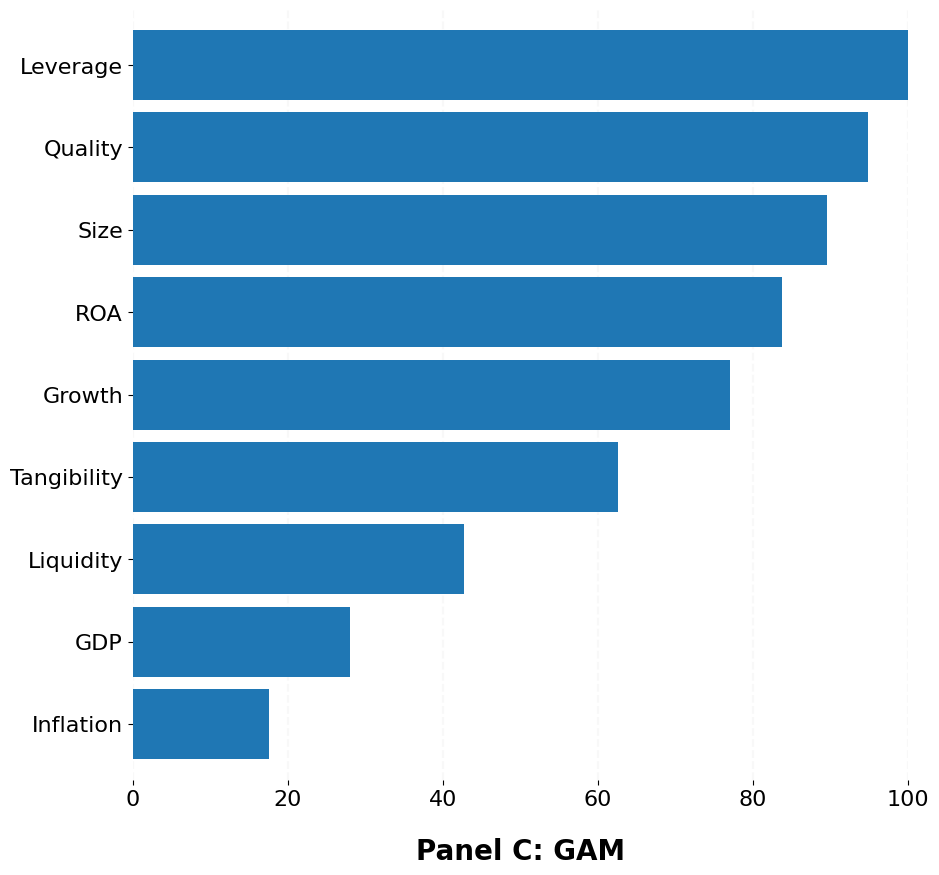

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#1f77b4', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel C: GAM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_GAM.png')

In [35]:
from sklearn.ensemble import RandomForestRegressor

data["RF"] = []
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["RF"].append(round(r_squared*100, 4))
data["RF"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)


R-squared 0.7140567540391068
RMSE 0.005559219392707132
      Variable  Coefficient
3          ROA         0.99
1      Quality         1.33
4       Growth         1.37
0     Leverage         1.45
7          GDP         1.55
6    Liquidity         1.69
8    Inflation         1.82
5  Tangibility         2.25
2         Size       100.00


/tmp/ipykernel_9654/205430632.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


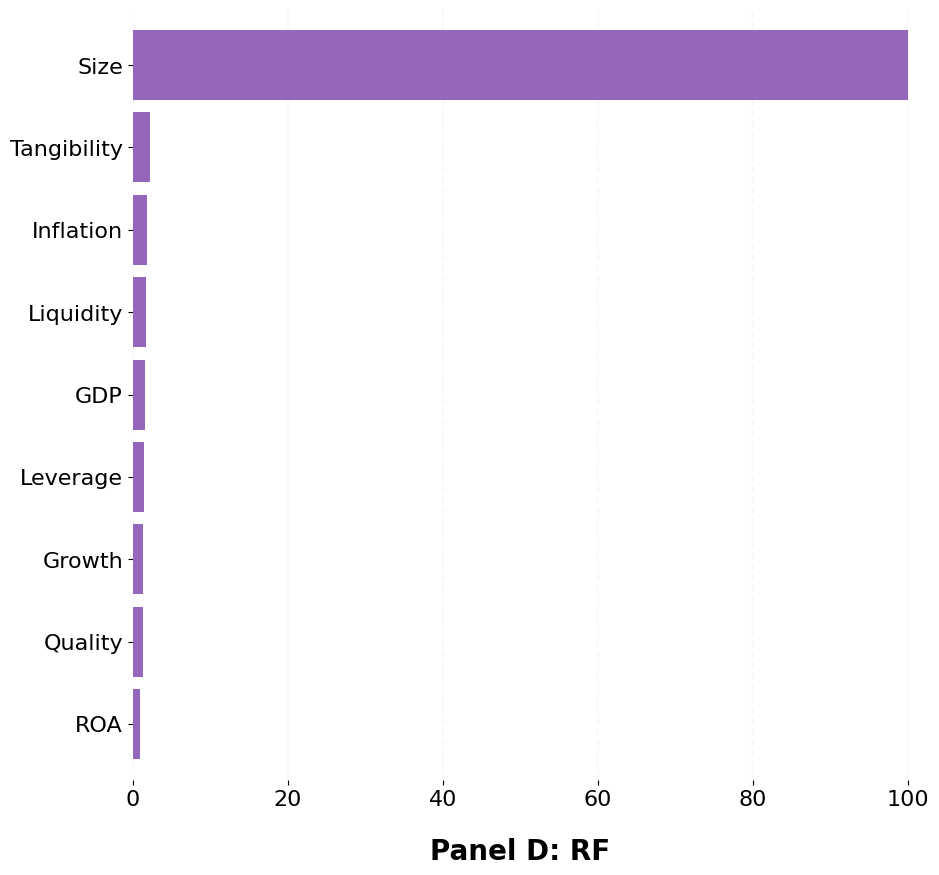

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#9467bd', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel D: RF", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_RF.png')

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

data["GBM"] = []
sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
 # print('Coefficients:', model.coef_)
data["GBM"].append(round(r_squared*100, 4))
data["GBM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.8487334277311489
RMSE 0.0029408775129465383
      Variable  Coefficient
4       Growth         0.16
6    Liquidity         0.28
7          GDP         0.93
5  Tangibility         1.32
8    Inflation         1.67
3          ROA         2.44
1      Quality         2.51
0     Leverage         3.12
2         Size       100.00


/tmp/ipykernel_9654/2019429249.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


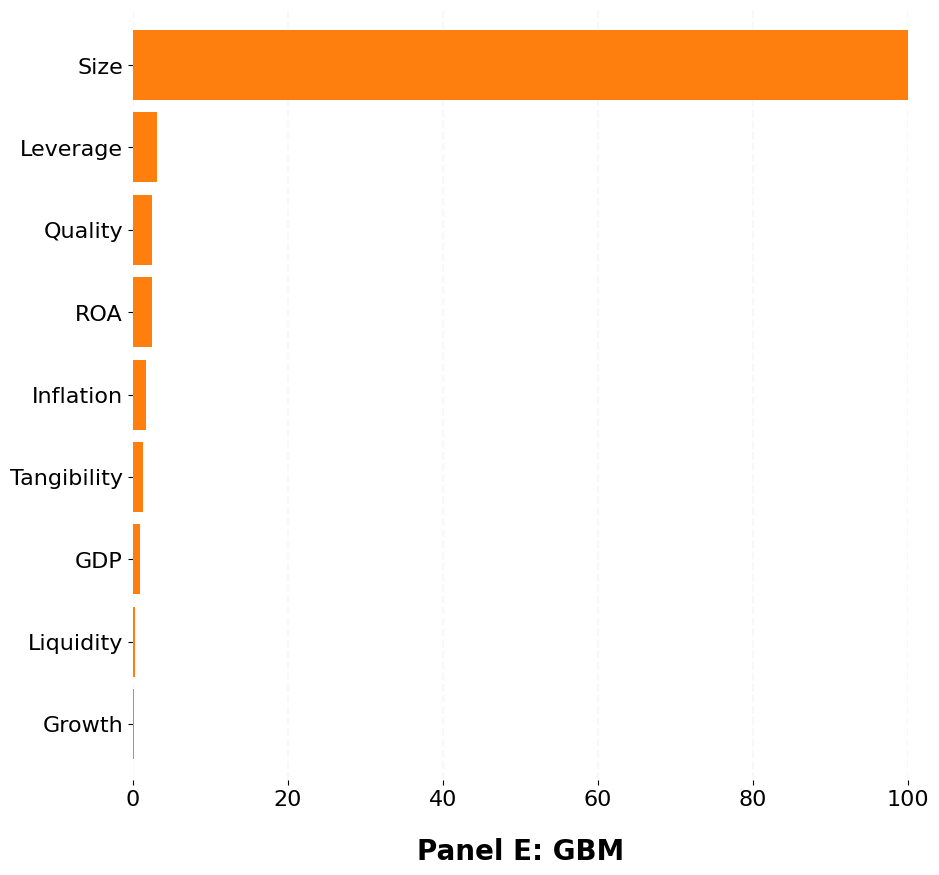

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#ff7f0e', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel E: GBM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_GBM.png')

In [39]:
from sklearn.neural_network import MLPRegressor

data["NNET"] = []
importances_over_time = []

model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

importances = abs(model.coefs_[0]).sum(axis=1)
importances = importances / max(importances) * 100
# importances_over_time.append(importances.round(4))

# print the model coefficients
data["NNET"].append(round(r_squared*100, 4))
data["NNET"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)


importances = abs(model.coefs_[0]).sum(axis=1)

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# print(importances_over_time)

R-squared 0.9114282016890387
RMSE 0.001721985274254675


/tmp/ipykernel_9654/4144608735.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


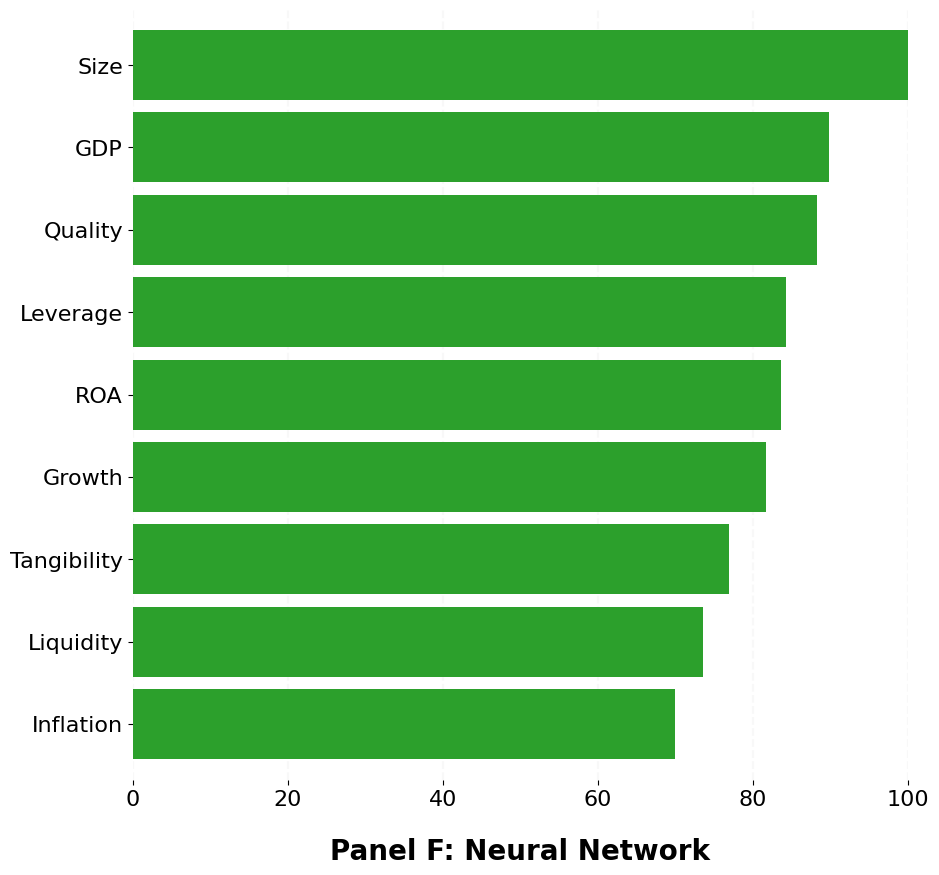

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#2ca02c', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel F: Neural Network", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_NNET.png')

In [41]:
data

{'LM': [37.7589, 0.0121007],
 'Lasso': [37.6657, 0.0121188],
 'GAM': [80.0548, 0.0038777],
 'RF': [71.4057, 0.0055592],
 'GBM': [84.8733, 0.0029409],
 'NNET': [91.1428, 0.001722]}